# Group 5 ASSIGNMENT


## 1. Abdoulaye DIEYE
## 2. Awadi Abalo KATANGA
## 3. Mikhael Presley KIBINDA MOUKENGUE
## 4. Fatou Sene DIENG
## 5. Bolaji Rolayo BAMIRO
## 6. Nokeme MEITE
## 7. Thierno Bassirou BALDE
## 7. Idrissou HEL HADJE SOUNON ALIDOU


###### Lecturer: Dr. Chamberlain Mbah --yields.io

--------------

**The purpose of the following exercises is mainly to get more familiar with biplot, and learn how to interpret these kinds of plots**

#### Import relevant libraries

In [2]:
import os #for operating system information such as working directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# We will import linear regression and two penalised regressions lasso and ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [3]:
os.getcwd()

'/home/blajir/Desktop/bbbbb'

In [4]:
#Data path
pathData='/home/blajir/Desktop/bbbbb'

In [5]:
# Read in the data 
Industries=pd.read_csv(pathData+'/Industries.csv')

## Exercises 

In this exercise we will focus on the interpretation of the biplot.

The file `Industries.csv` contains data on the distribution of employment between 9 industrial sectors, in 26
European countries. The dataset stems from the Cold-War era; the data are expressed as percentages. Read in the data and have a feel about it.


In [6]:
Industries

,country,agriculture,mining,manufacturing,power.supply,construction,services,finance,social.sector,transport
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,UK,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


In [20]:
Industries.describe().T

,count,mean,std,min,25%,50%,75%,max
agriculture,26.0,19.130769,15.546569,2.7,7.700,14.45,23.675,66.8
mining,26.0,1.253846,0.970044,0.1,0.525,0.95,1.800,3.1
manufacturing,26.0,27.007692,7.007763,7.9,23.000,27.55,30.200,41.2
power.supply,26.0,0.907692,0.376216,0.1,0.600,0.85,1.175,1.9
construction,26.0,8.165385,1.645586,2.8,7.525,8.35,8.975,11.5
services,26.0,12.957692,4.575253,5.2,9.250,14.40,16.875,19.1
finance,26.0,4.000000,2.806564,0.5,1.225,4.65,5.925,11.3
social.sector,26.0,20.023077,6.829542,5.3,16.250,19.65,24.125,32.4
transport,26.0,6.546154,1.391469,3.2,5.700,6.70,7.075,9.4


1. Perform the truncated SVD for k = 2, and construct the biplot accordingly. Check the course notes for this

In [7]:
X=Industries.drop('country',axis=1)
n=X.shape[0]


H=np.diag(np.repeat(1,n))-(1/n)*np.ones((n,n))

X_centered=np.matmul(H,X)
U,D,V_transpose=np.linalg.svd(X_centered)


k=2

U_k=U[:,0:k]
D_k=np.diag(D[0:k])
Z_k=np.matmul(U_k,D_k)

pd.DataFrame(Z_k,index=Industries.country,columns=['Z_1','Z_2']).head()

,Z_1,Z_2
country,,
Belgium,-17.516687,-4.926228
Denmark,-11.496688,-11.661766
France,-9.128686,-2.168282
W. Germany,-14.393424,5.047494
Ireland,4.458174,-6.131565


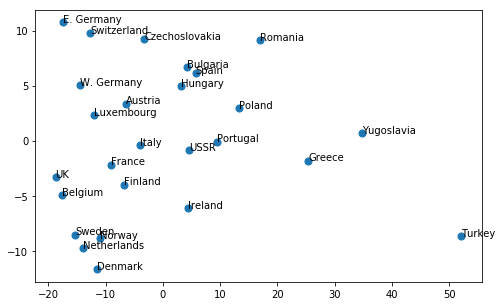

In [8]:
#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))


ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=Industries.country

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
#used to label the dots

plt.show()

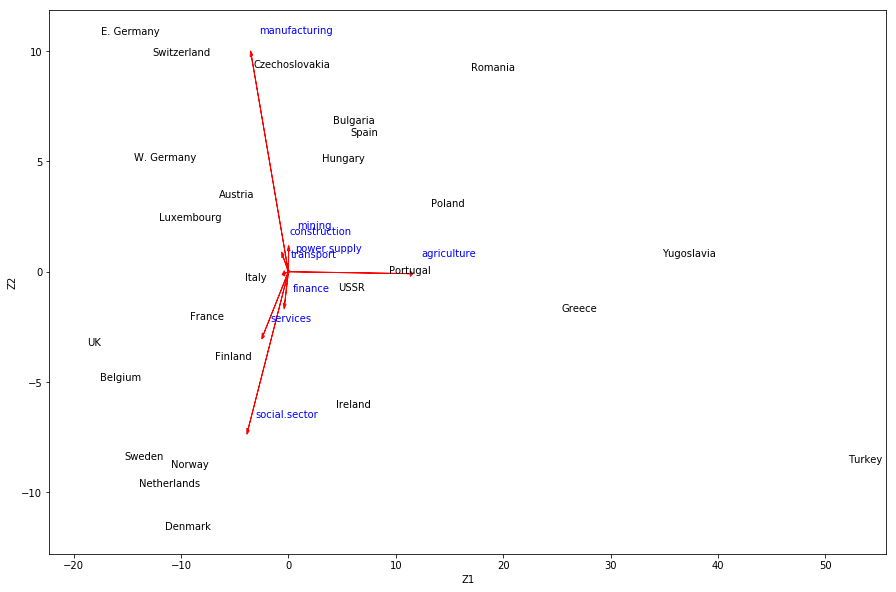

In [9]:
V_k=V_transpose.T[:,0:k]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=0)


txt1=Industries.country
txt2=Industries.columns[1:]


gamma=13




for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_k[i,0],Z_k[i,1]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_k[i,0],gamma*V_k[i,1],
             color="red",
            length_includes_head=True,head_width=0.25, head_length=0.25)
    
    ax.annotate(txt2[i], (gamma*(V_k[i,0]+0.06),gamma*(V_k[i,1]+0.06)),
                color='blue')
plt.show()

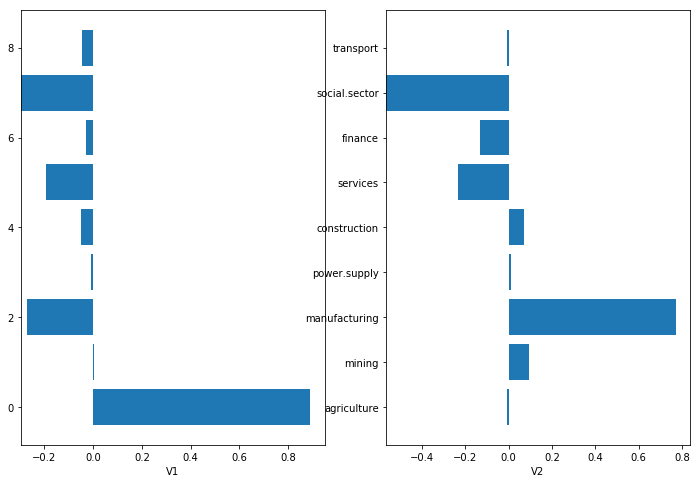

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
y_pos = np.arange(9)

ax[0].set_xlabel('V1')
ax[1].set_xlabel('V2')

# Create horizontal bars
ax[0].barh(y_pos, V_k[:,0])
ax[1].barh(y_pos, V_k[:,1])
plt.yticks(y_pos, Industries.columns[1:])
plt.show()


2. To see if we can learn more when retaining more dimensions, repeat the truncated SVD for k = 3.
Construct two-dimensional biplots for:
* Z1 and Z2
* Z1 and Z3
* Z2 and Z3

In [11]:
f=3

U_f=U[:,0:f]
D_f=np.diag(D[0:f])
Z_f=np.matmul(U_f,D_f)

pd.DataFrame(Z_f,index=Industries.country,columns=['Z_1','Z_2','Z_3']).head()

,Z_1,Z_2,Z_3
country,,,
Belgium,-17.516687,-4.926228,-2.355281
Denmark,-11.496688,-11.661766,3.002028
France,-9.128686,-2.168282,-2.750306
W. Germany,-14.393424,5.047494,0.205690
Ireland,4.458174,-6.131565,-1.924001


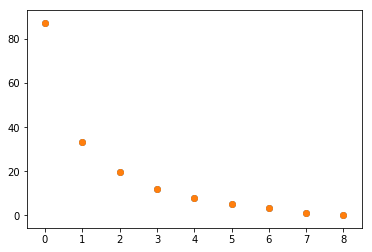

In [22]:
plt.scatter(x= range(9), y=D)

plt.show()

In [34]:
np.round((D/np.sum(D))*100)

array([ 51.,  20.,  12.,   7.,   5.,   3.,   2.,   1.,   0.])

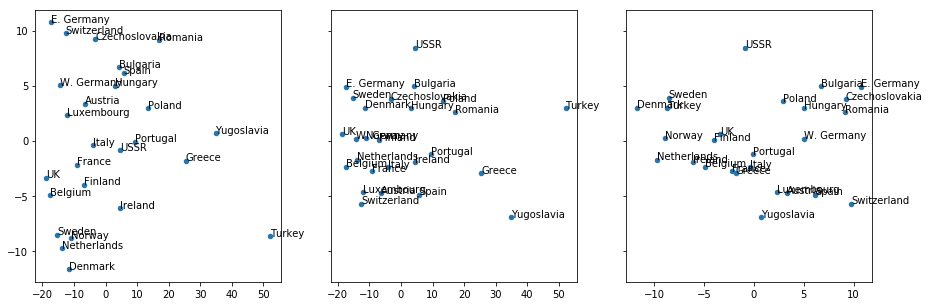

In [39]:
# for Z1 and Z2
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,3,figsize=(15,5), sharey=True)

ax[0].scatter(x=Z_f[:,0],y=Z_f[:,1],s=20)
txt=Industries.country


# for Z1 and Z3

ax[1].scatter(x=Z_f[:,0],y=Z_f[:,2],s=20)
txt=Industries.country

# for Z2 and Z3
ax[2].scatter(x=Z_f[:,1],y=Z_f[:,2],s=20)
txt=Industries.country



for i, txt in enumerate(txt):
    ax[0].annotate(txt, (Z_f[i,0],Z_f[i,1]))
    ax[1].annotate(txt, (Z_f[i,0],Z_f[i,2]))
    ax[2].annotate(txt, (Z_f[i,1],Z_f[i,2]))


plt.show()

# for Z1 and Z2

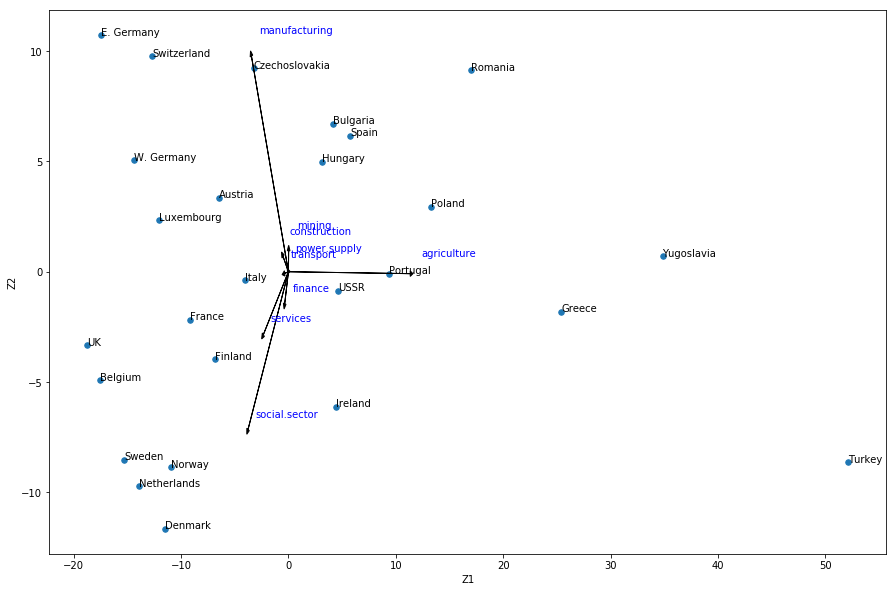

In [31]:
# for Z1 and Z2
V_f=V_transpose.T[:,0:f]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.scatter(x=Z_f[:,0],y=Z_f[:,1],s=30)


txt1=Industries.country
txt2=Industries.columns[1:]


gamma=13




for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_f[i,0],Z_f[i,1]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_f[i,0],gamma*V_f[i,1],
             color="black",
            length_includes_head=True,head_width=0.25, head_length=0.25)
    
    ax.annotate(txt2[i], (gamma*(V_f[i,0]+0.06),gamma*(V_f[i,1]+0.06)),
                color='blue')
plt.show()

# Z1 and Z3

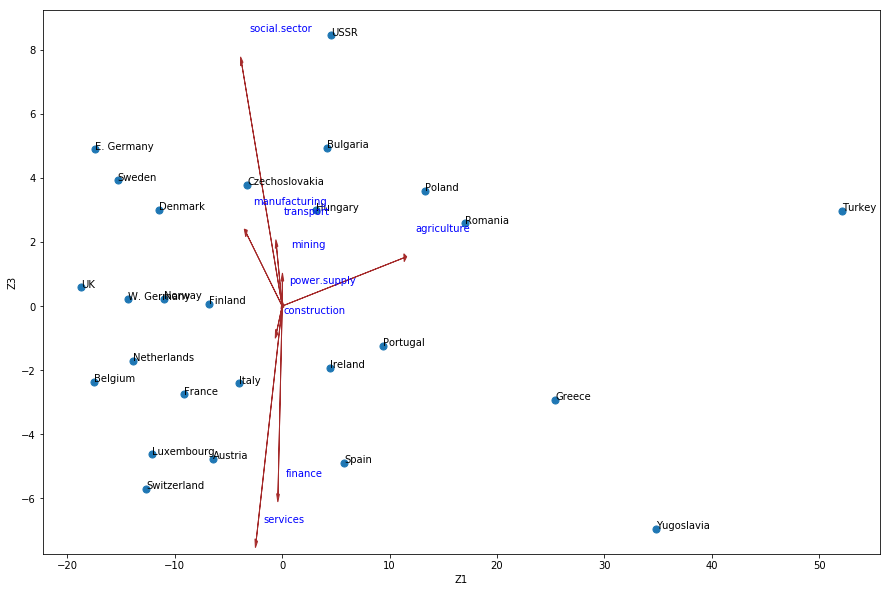

In [35]:
#Z1 and Z3
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Z1')
ax.set_ylabel('Z3')
ax.scatter(x=Z_f[:,0],y=Z_f[:,2],s=50)


txt1=Industries.country
txt2=Industries.columns[1:]


gamma=13




for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_f[i,0],Z_f[i,2]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_f[i,0],gamma*V_f[i,2],
             color="brown",
            length_includes_head=True,head_width=0.25, head_length=0.25)
    
    ax.annotate(txt2[i], (gamma*(V_f[i,0]+0.06),gamma*(V_f[i,2]+0.06)),
                color='blue')
plt.show()

# Z2 and Z3

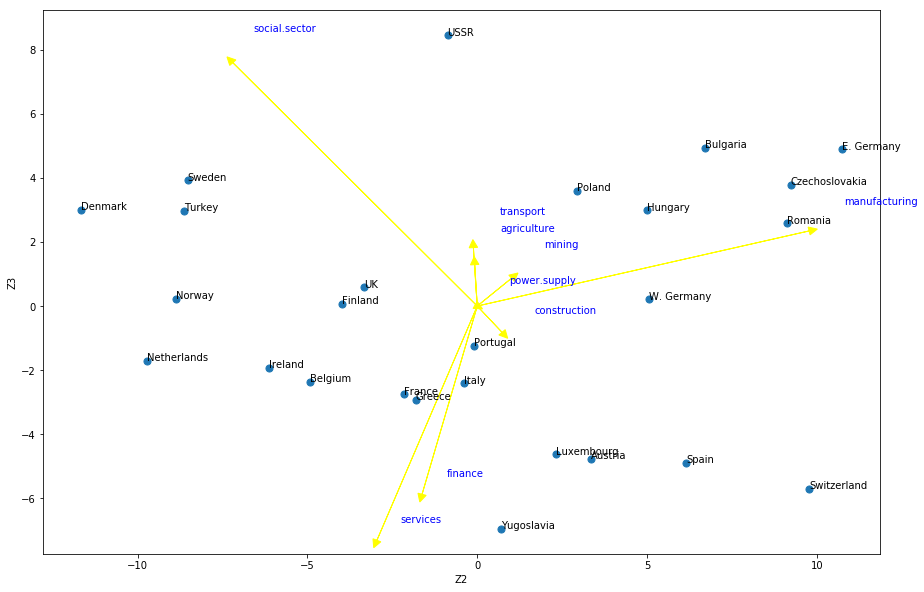

In [40]:
#Z2 and Z3
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Z2')
ax.set_ylabel('Z3')
ax.scatter(x=Z_f[:,1],y=Z_f[:,2],s=50)


txt1=Industries.country
txt2=Industries.columns[1:]


gamma=13




for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_f[i,1],Z_f[i,2]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_f[i,1],gamma*V_f[i,2],
             color="yellow",
            length_includes_head=True,head_width=0.25, head_length=0.25)
    
    ax.annotate(txt2[i], (gamma*(V_f[i,1]+0.06),gamma*(V_f[i,2]+0.06)),
                color='blue')
plt.show()

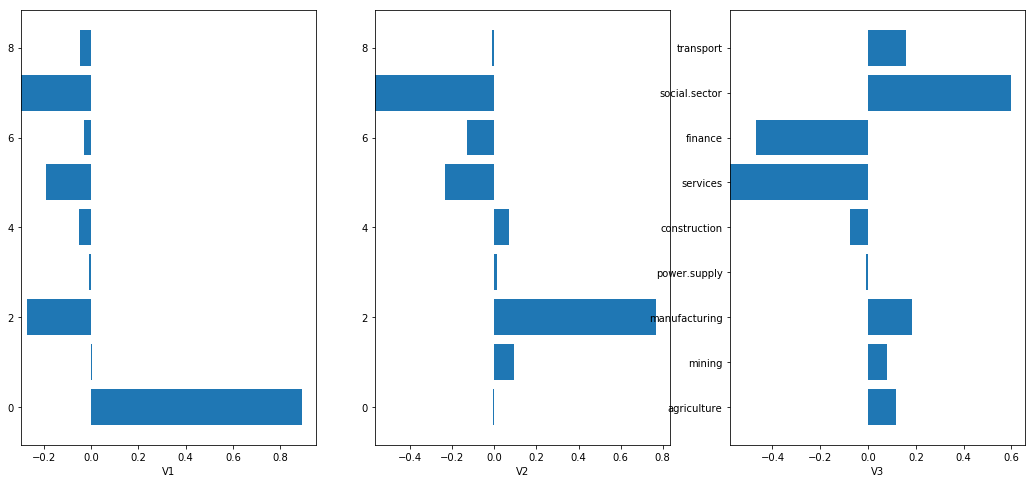

In [17]:
fig, ax = plt.subplots(1,3,figsize=(18,8))
y_pos = np.arange(9)

ax[0].set_xlabel('V1')
ax[1].set_xlabel('V2')
ax[2].set_xlabel('V3')

# Create horizontal bars

plt.yticks(y_pos, Industries.columns[1:])
ax[0].barh(y_pos, V_f[:,0])
ax[1].barh(y_pos, V_f[:,1])
ax[2].barh(y_pos, V_f[:,2])
plt.show()

3. Can you give a meaningful interpretation to each dimension? Interpretation is crucial.
   Do this part of the exercise in groups as assigned by the tutors. Submit your interpretation by mail to `chamberlain.mbah.f@gmail.com`

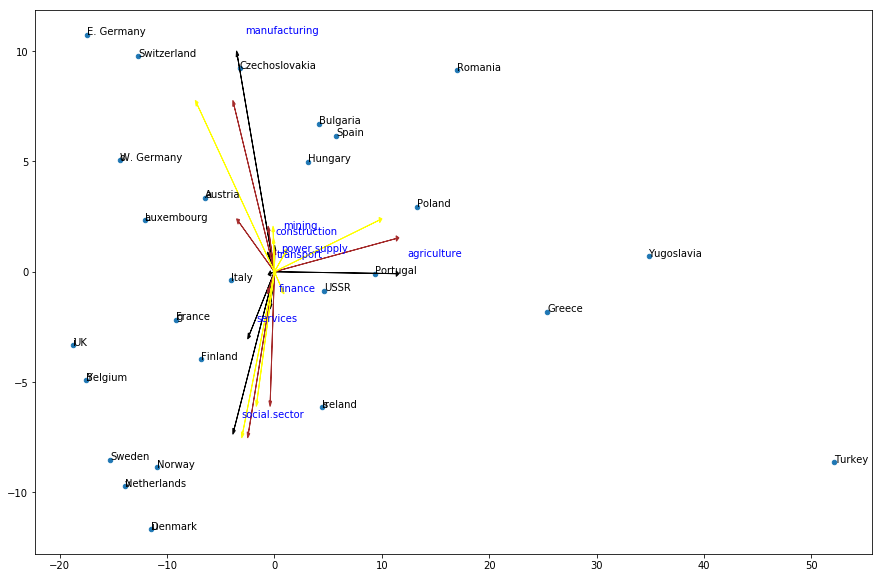

In [30]:
V_f=V_transpose.T[:,0:f]
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x=Z_f[:,0],y=Z_f[:,1],s=20)


txt1=Industries.country
txt2=Industries.columns[1:]


gamma=13




for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_f[i,0],Z_f[i,1]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_f[i,0],gamma*V_f[i,1],
             color="black",
            length_includes_head=True,head_width=0.25, head_length=0.25)
    
    ax.annotate(txt2[i], (gamma*(V_f[i,0]+0.06),gamma*(V_f[i,1]+0.06)),
                color='blue')
    
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_f[i,0],gamma*V_f[i,2],
             color="brown",
            length_includes_head=True,head_width=0.25, head_length=0.25)
    
    
for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_f[i,0],Z_f[i,1]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_f[i,1],gamma*V_f[i,2],
             color="yellow",
            length_includes_head=True,head_width=0.25, head_length=0.25)
    
 
    
    
    
plt.show()

This graph shown above with the black as Z1 Z2 and the brown as Z1 Z3 and the yellow lines as Z2 Z3 shows the difference in the projections of Vk on Zk as we lose information but obtain the best for Z1 Z2.

# Interpretation  of dimensions K=2 and K=3


Le graphique suggère que d'une part  les pays comme Denmark, Norway, Sweden, Netherlands ont  une répartition 
d'employabilité assez similaires. D'autre part le trio  Spain, Hungary et Bulgaria ont aussi une meme répartition. Par contre la Turkey a une répartition d'employabilité très différente des deux premiers groupes. 
Pour le moment, nous ne pouvons pas en dire plus. 
Nous devons d’abord obtenir une interprétation des deux axes afin d’exprimer les similitudes et les différences entre tous ces pays.

From the 2D visualization graph ploted when k = 2 i.e second dimension, it was suggested that Bulgaria and Spain have similar percentage employment in the nine given industrial sectors while Germany and Turkey are least similar in among all countries. 
From the 2D visualization graph when k = 3 i.e third dimension, comparing the graphs Z1 Z2 , Z1 Z3 and Z2 Z3, the Z1 Z2 graph has more information while the Z1 Z3 has lesser information and gives different position of countries , Z2 Z3 is the least precise and also shows different position of countries. There significant change of position of countries in graphs Z1 Z2 , Z1 Z3 and Z2 Z3. Getting the approximation percentage of D1 which is 51%, D2 is 20%, while D3 is 12% confirms that Z1 Z2 gives about 71% of the information, Z1 Z3 gives  about 63% and Z2 Z3 gives about 32% which is less than half. We can conclude at this point that since Z1 Z2 contains most of the information, it is a good approximation and we can interpret information from the second dimension.

From the biplot of k=2, 
Italy and USSR are quite close to the origin which means that we could say they are close to the average percentage of employment distribution between 9 industrial sector in 26 European countries for this given set of data.

We select Turkey, Luxemberg, Romania and Sweden for analysis;


When we project Turkey orthogonally onto the vector $ ṽ $ 18j (j = manufacture), we get a large but negative   $x_{18ij}$. Hence, people in Turkey tend to get employed a lot less in the manufacturning sector than average in Europe. Also, projecting Turkey orthogonally onto the vector $ṽ$ 18j (j = Agriculture), we get large and positive $x_{18ij}$. Hence, people in Turkey tend to get employed a lot more in the Agricultural sector than average in Europe. And projecting Turkey orthogonally onto the vector $ṽ 18j$ (j = Social sector), we get a large and positive $x_{18ij}$ . Hence,people in Turkey tend to get employed a lot more social sector than on average in Europe.



When we project Luxembourg orthogonally onto the vector $ ṽ $ 6j (j = manufacture), we get a small but positive $ x_{6ij}$. Hence, people in Luxembourg tend to get employed a bit more in the manufacturning sector than average in Europe. Also, projecting Luxembourg orthogonally onto the vector $ ṽ$ 6j (j = Agriculture), we get small and negative $x_{6ij}$. Hence, people in Luxembourg tend to get employed a bit less in the Agricultural sector than average in Europe. And projecting Luxembourg onto the vector $ṽ$ 6j (j = Social sector), we get a small and positive $x_{6ij}$ . Hence,people in Luxembourg tend to get employed a bit more social sector than on average in Europe.


When we project Romania orthogonally onto the vector $ ṽ $ 23j (j = manufacture), we get a large and positive $x_{23ij}$. Hence, people in Romania tend to get employed a lot more in the manufacturning sector than average in Europe. Also, projecting Romania orthogonally onto the vector$ ṽ$ 23j (j = Agriculture), we get large and positive $x_{23ij}$. Hence, people in Romania tend to get employed a lot more in the Agricultural sector than average in Europe. And projecting Romania orthogonally onto the vector $ṽ$ 23j (j = Social sector), we get a large and negative $x_{23ij}$ . Hence,people in Romania tend to get employed a lot less social sector than on average in Europe.

When we project Sweden orthogonally onto the vector $ṽ$ 15j (j = manufacture), we get a large but negative $x_{15ij}$. Hence, people in Sweden tend to get employed a lot less in the manufacturning sector than average in Europe. Also, projecting Sweden orthogonally onto the vector $ṽ$ 15j (j = Agriculture), we get small and negative $x_{15ij}$. Hence, people in Sweden tend to get employed a bit less in the Agricultural sector than average in Europe. And projecting Sweden orthogonally onto the vector $ṽ$ 15j (j = Social sector), we get a large and positive $x_{15ij}$ . Hence,people in Sweden tend to get employed a lot more social sector than on average in Europe.


To futher interpret Z; From the bargraphs,

For v1
(1st dimension of Z (k=2))

A large value of $z_{i1}$ can result from much more employment in the Agricultural sector but less employment in the social sector and manufacturing sector.
A small value of $z_{i1}$ can result from more employment in social sector and manufacturing sector but less or few employment in the Agricultural sector.


For v2
(2nd dimension of Z (k=2))

A large value of  $z_{i2}$ can result from much more employment in the manufacturing sector but less employment in the social sector and services.
A small value of $z_{i2}$ can result from more employment in social sector and services but less or few employment in the manufacturing sector.


For v3
(3rd dimension of Z (k=3))

A large value of $z_{i3}$ can result from much more employment in the Social and transport sector and but less employment in the finance and services sector.
A small value of $z_{i3}$ can result from more employment in finance and services sector but less or few employment in the Social and transport sector.



Remark: We will acheive better results if we plot the 3D graph of Z3 which takes into consideration Z1 Z2 Z3 and V1 V2 V3 to get more information and make more precise interpretation.

All graphs Z1 Z2 , Z1 Z3 and Z2 Z3 are two dimensional plots of Z3 and analysis was made only on Z1 Z2 because the rest will definitly give less precise information which is not needed. If Interpretation is made on Z1 Z3 and Z2 Z3, we will get different interpretation from Z1 Z2 which will be false.